In [1]:
pip install tensorflow numpy matplotlib scikit-learn

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16,MobileNetV2,EfficientNetB0,ResNet50
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img

load and preprocess the data

In [3]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train,y_train=x_train[:5000],y_train[:5000]
x_test,y_test=x_test[:1250],y_test[:1250]

normalize the data

In [5]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

reshape

In [6]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

one hot encoding

In [7]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

resize image for VGG16

In [8]:
x_train_resized = tf.image.resize(x_train, [224, 224])
x_test_resized = tf.image.resize(x_test, [224, 224])

In [9]:
x_train_resized = tf.repeat(x_train_resized, 3, axis=-1)
x_test_resized = tf.repeat(x_test_resized, 3, axis=-1)

In [10]:
x_train_resized = x_train_resized.numpy()
x_test_resized = x_test_resized.numpy()

load the pretrained VGG model

In [11]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [12]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

add layers for classification

In [13]:
model=models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(x_train_resized,y_train,epochs=15,batch_size=16,validation_split=0.2)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 142ms/step - accuracy: 0.4700 - loss: 1.8776 - val_accuracy: 0.8020 - val_loss: 0.5032
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 70s 138ms/step - accuracy: 0.7101 - loss: 0.7899 - val_accuracy: 0.8540 - val_loss: 0.4557
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.7333 - loss: 0.7208 - val_accuracy: 0.8760 - val_loss: 0.3572
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.7484 - loss: 0.6237 - val_accuracy: 0.8590 - val_loss: 0.3878
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.7733 - loss: 0.5998 - val_accuracy: 0.8800 - val_loss: 0.3410
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - accuracy: 0.7690 - loss: 0.5787 - val_accuracy: 0.8860 - val_loss: 0.4012
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 125ms/step - accuracy: 0.7539 - loss: 0.6035 - val_accuracy: 0.9040 - val_loss: 0.2990
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 142ms/step - accuracy: 0.7892 - loss: 0

model evaluation

In [17]:
test_loss,test_accuracy=model.evaluate(x_test_resized,y_test)
print('test accuracy:',test_accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 227ms/step - accuracy: 0.8722 - loss: 0.3559
test accuracy: 0.881600022315979


predictions

In [18]:
y_pred=model.predict(x_test_resized)
y_pred_class=np.argmax(y_pred,axis=1)
y_true_class=np.argmax(y_test,axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step


confusion matrix

In [19]:
matrix=confusion_matrix(y_true_class,y_pred_class)
print(matrix)

[[ 98   0   1   7   1   0  20   0   0   0]
 [  0 127   0   1   0   0   0   0   0   0]
 [  2   0 103   0  23   0   8   0   0   0]
 [  1   2   0 102   4   0   4   0   0   0]
 [  0   0   1   4 136   0   7   0   0   0]
 [  0   0   0   0   0 115   0   2   0   1]
 [  9   0   4   7  27   0  80   0   1   0]
 [  0   0   0   0   0   2   0 115   0   2]
 [  0   0   0   1   2   0   0   0 112   0]
 [  0   0   0   0   0   1   0   3   0 114]]


In [20]:
classification_report=classification_report(y_true_class,y_pred_class,target_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [21]:
print(classification_report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.77      0.83       127
     Trouser       0.98      0.99      0.99       128
    Pullover       0.94      0.76      0.84       136
       Dress       0.84      0.90      0.87       113
        Coat       0.70      0.92      0.80       148
      Sandal       0.97      0.97      0.97       118
       Shirt       0.67      0.62      0.65       128
     Sneaker       0.96      0.97      0.96       119
         Bag       0.99      0.97      0.98       115
  Ankle boot       0.97      0.97      0.97       118

    accuracy                           0.88      1250
   macro avg       0.89      0.88      0.89      1250
weighted avg       0.89      0.88      0.88      1250



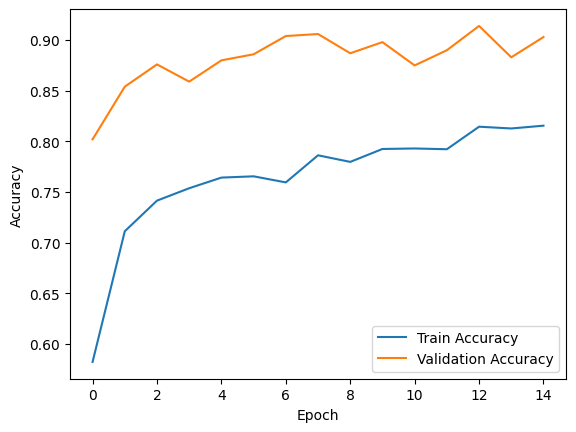

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


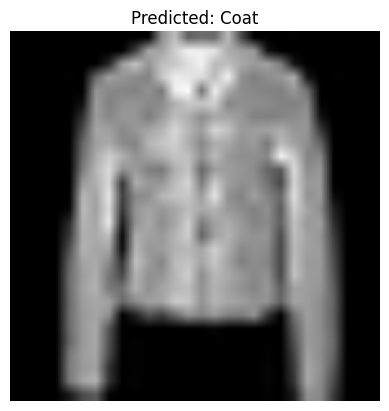

In [23]:
def predict_image(index):

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    img = x_test_resized[index]
    img = (img * 255).astype(np.uint8)
    plt.imshow(img)
    plt.axis('off')

    pred = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(pred)

    plt.title(f'Predicted: {class_names[predicted_label]}')
    plt.show()

predict_image(10)


In [24]:
import seaborn as sns

<Axes: >

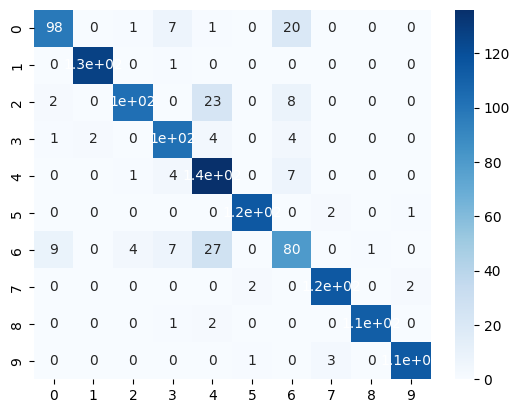

In [25]:
sns.heatmap(matrix,annot=True, cmap="Blues")

Resnet

In [28]:
resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [31]:
model=models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])

In [32]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [34]:
h1=model.fit(x_test_resized,y_train,epochs=15,batch_size=16,validation_split=0.2)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.0979 - loss: 2.3019 - val_accuracy: 0.1120 - val_loss: 2.3059
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.1174 - loss: 2.2985 - val_accuracy: 0.1120 - val_loss: 2.3060
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 0.1206 - loss: 2.2873 - val_accuracy: 0.1120 - val_loss: 2.3061
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.1067 - loss: 2.2986 - val_accuracy: 0.1120 - val_loss: 2.3062
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.1085 - loss: 2.3016 - val_accuracy: 0.1120 - val_loss: 2.3064
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.1259 - loss: 2.2947 - val_accuracy: 0.1120 - val_loss: 2.3063
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.1055 - loss: 2.3005 - val_accuracy: 0.1120 - val_loss: 2.3065
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.1259 - loss: 2.2985 - val_accuracy

mobilenet

In [37]:
mobile=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
mobile.trainable=False

In [38]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [39]:
h2=model.fit(x_test_resized,y_train,epochs=15,batch_size=16,validation_split=0.2)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.1064 - loss: 2.2997 - val_accuracy: 0.1120 - val_loss: 2.3075
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.1145 - loss: 2.2966 - val_accuracy: 0.1120 - val_loss: 2.3074
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.1031 - loss: 2.2979 - val_accuracy: 0.1120 - val_loss: 2.3073
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.1212 - loss: 2.3002 - val_accuracy: 0.1120 - val_loss: 2.3073
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.1112 - loss: 2.3001 - val_accuracy: 0.1120 - val_loss: 2.3074
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.1051 - loss: 2.2989 - val_accuracy: 0.1120 - val_loss: 2.3073
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.1145 - loss: 2.2946 - val_accuracy: 0.1120 - val_loss: 2.3072
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.1225 - loss: 2.2977 - val_accuracy